In [ ]:
# Add more Dense layers to the existing code and check how the accuracy changes
from google.colab import drive 
drive.mount('/content/gdrive')

path_to_csv = '/content/gdrive/My Drive/breastcancer.csv'

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# loading dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn_model = Sequential() # creating the model
my_nn_model.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn_model.add(Dense(32, activation='relu'))
my_nn_model.add(Dense(1, activation='sigmoid')) # output layer
my_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn_model.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn_model.summary())
print(my_nn_model.evaluate(X_test, Y_test))

In [25]:
# Normalize the data before feeding the data to the model and check how the normalization change your accuracy
from google.colab import drive 
drive.mount('/content/gdrive')

path_to_csv = '/content/gdrive/My Drive/breastcancer.csv'

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# loading dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn_model = Sequential() # creating model
my_nn_model.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn_model.add(Dense(1, activation='sigmoid')) # output layer
my_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn_model.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn_model.summary())
print(my_nn_model.evaluate(X_test, Y_test))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 50.7335 - acc: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 20.4039 - acc: 0.6197
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 2.5476 - acc: 0.7770
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8702 - acc: 0.6643
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.0147 - acc: 0.8521
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.9076 - acc: 0.8944
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7771 - acc: 0.8709
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7363 - acc: 0.8685
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6951 - acc: 0.8732
Epoch 10/100
14/14 [=

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2469 - accuracy: 0.9258 - val_loss: 0.1097 - val_accuracy: 0.9646
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.1003 - accuracy: 0.9690 - val_loss: 0.0808 - val_accuracy: 0.9746
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0720 - val_accuracy: 0.9781
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0668 - val_accuracy: 0.9796
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0677 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0399 - accuracy: 0.9865 - val_loss: 0.0567 - val_accuracy: 0.9826
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - l

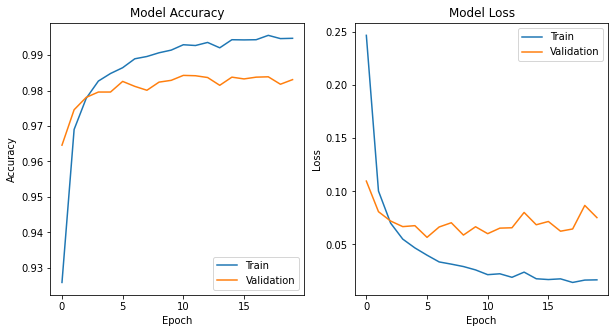

In [26]:
# Plot the loss and accuracy for both training data and validation data using the history object in the source code
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# converting class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# creating a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model and record the training history
history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                    epochs=20, batch_size=128)

# to plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.2466 - accuracy: 0.9255 - val_loss: 0.1177 - val_accuracy: 0.9637
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1013 - accuracy: 0.9680 - val_loss: 0.0919 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 11s 22ms/step - loss: 0.0714 - accuracy: 0.9772 - val_loss: 0.0835 - val_accuracy: 0.9732
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0579 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0643 - val_accuracy:

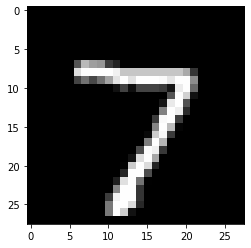

1/1 [==============================] - 0s 110ms/step
Model prediction: 7


In [27]:
#  Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# loading mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# converting class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# to create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# to train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)

# to plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()

# making a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))

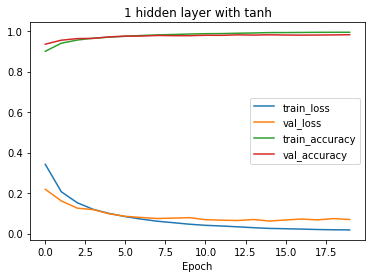

1 hidden layer with tanh - Test loss: 0.0695, Test accuracy: 0.9816


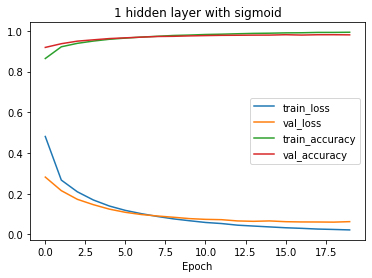

1 hidden layer with sigmoid - Test loss: 0.0625, Test accuracy: 0.9810


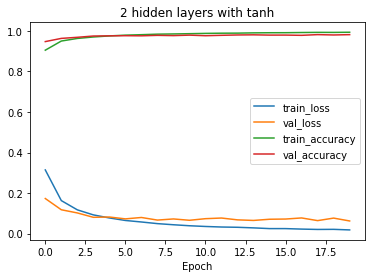

2 hidden layers with tanh - Test loss: 0.0623, Test accuracy: 0.9819


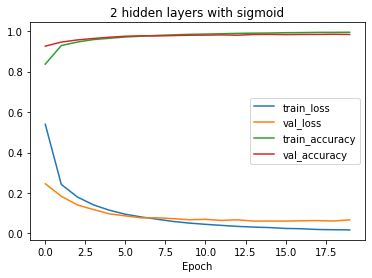

2 hidden layers with sigmoid - Test loss: 0.0674, Test accuracy: 0.9830


In [28]:
# We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))


In [ ]:
# Run the same code without scaling the images and check the performance
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))